1. Download the dataset

2. Load the dataset into the tool

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

3. Visualization

 a) Univariate Analysis

> barchart,histogram,pie chart,frequency polygram



 b) Bi - Variate Analysis


> scatterplot,Linear correleation



 c) Multi - Variate Analysis

<BarContainer object of 200 artists>

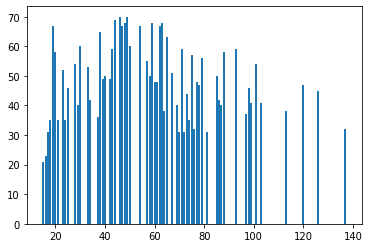

In [6]:
#barplot

plt.bar(data=dataset,height="Age",x="Annual Income (k$)")

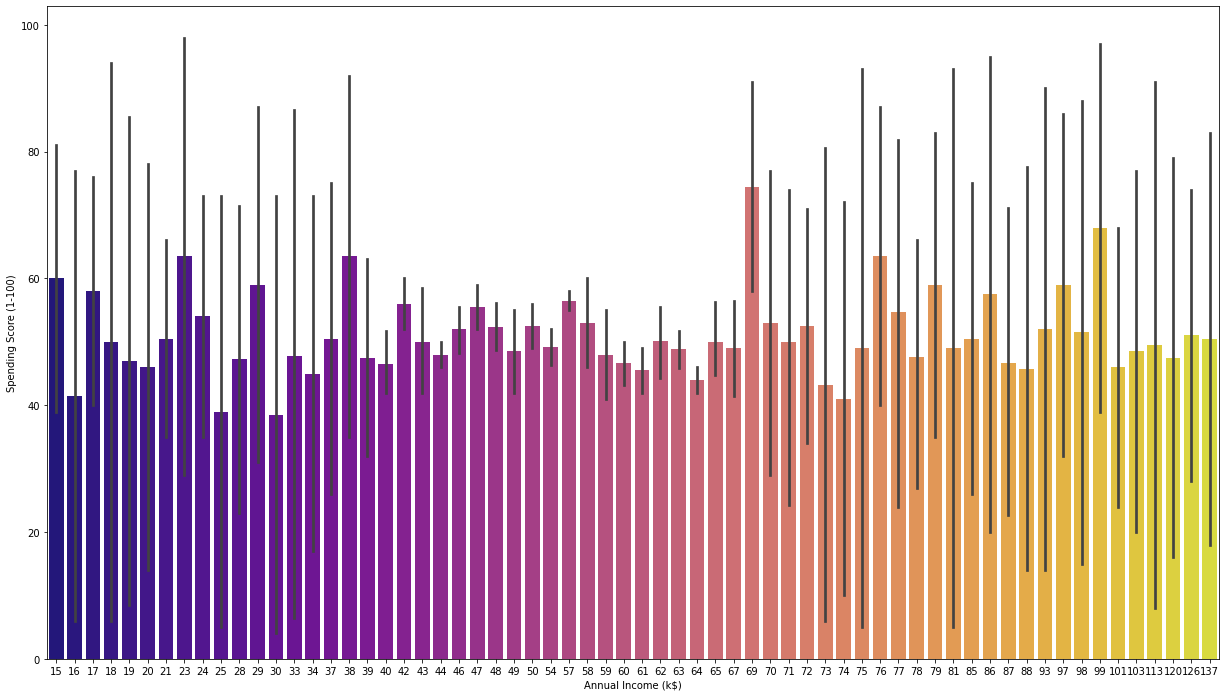

In [8]:
fig=plt.figure(figsize=(21,12))
sns.barplot(x ='Annual Income (k$)', y ='Spending Score (1-100)', data = dataset, palette ='plasma')

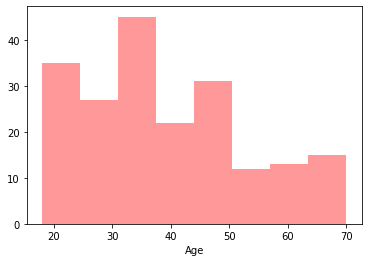

In [9]:
#histogram

sns.distplot(dataset["Age"],kde=False,color='red')

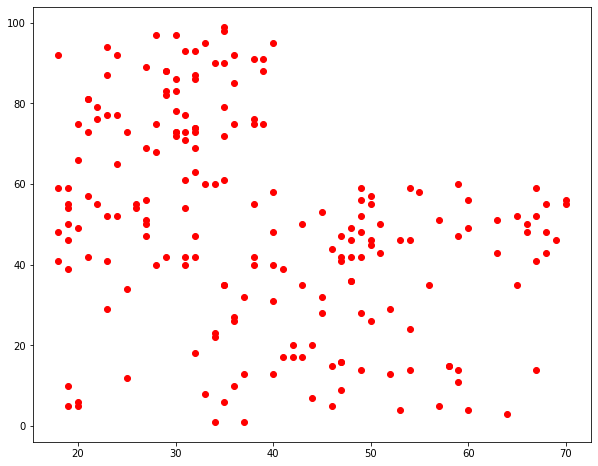

In [10]:
#scatterplot

fig=plt.figure(figsize=(10,8))
plt.scatter(dataset['Age'],dataset["Spending Score (1-100)"],color='red')

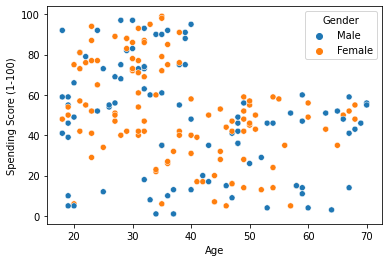

In [11]:
#scattorplot

sns.scatterplot(x='Age',y='Spending Score (1-100)',hue='Gender',data=dataset)

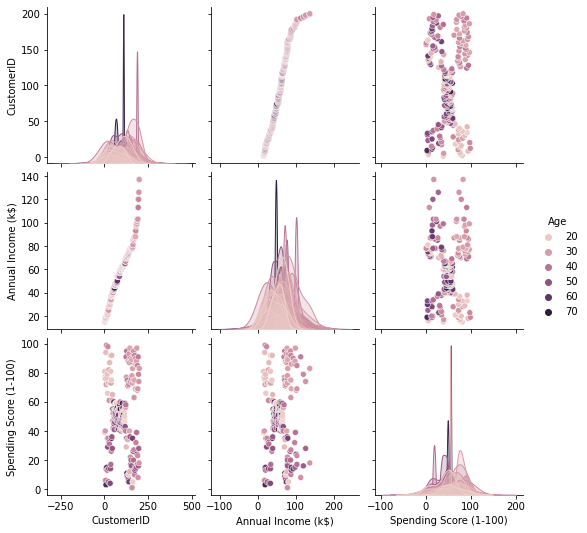

In [12]:
#pairplot

sns.pairplot(dataset,hue="Age")

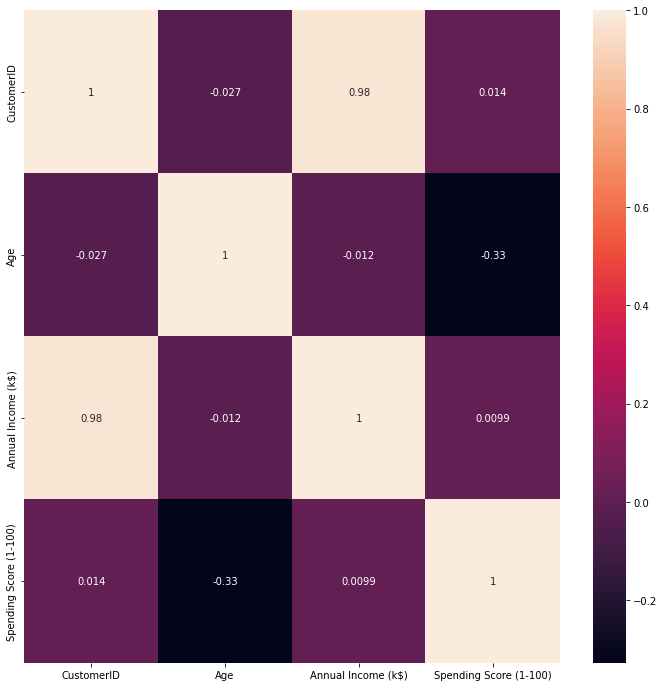

In [13]:
#heatmap

corr=dataset.corr()
fig=plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

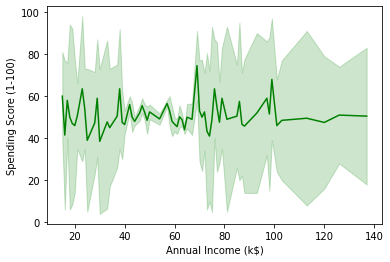

In [14]:
#lineplot

sns.lineplot(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'],color='green')

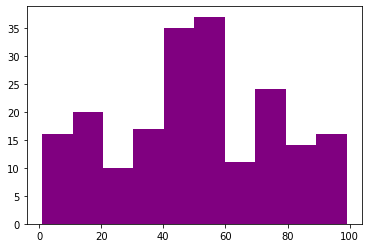

In [15]:
#histogram

plt.hist(dataset['Spending Score (1-100)'],color='purple')
plt.show()

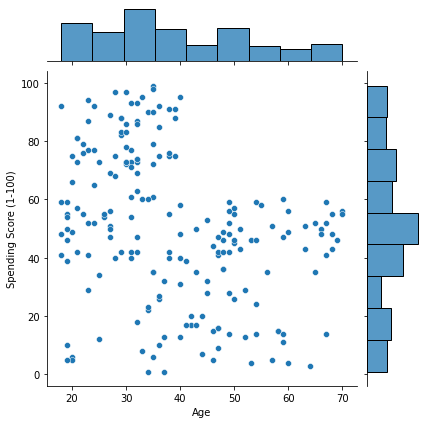

In [16]:
#jointplot

sns.jointplot(dataset['Age'],dataset['Spending Score (1-100)'])

4. Perform descriptive statistics on the dataset

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
des=dataset.describe().T
des

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


5. Check for Missing values and deal with them

In [19]:
dataset.isna().sum().sum()

0

6. Find the outliers and replace them outliers

In [20]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


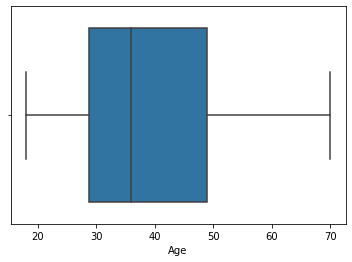

In [21]:
#checking outliers
sns.boxplot(dataset['Age'])

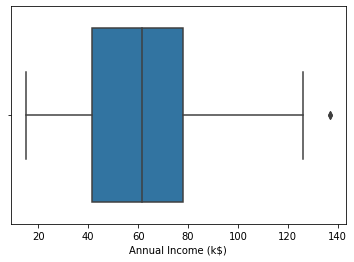

In [22]:
#checking outliers
sns.boxplot(dataset['Annual Income (k$)'])

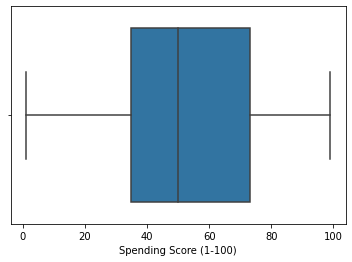

In [23]:
#checking outliers
sns.boxplot(dataset['Spending Score (1-100)'])

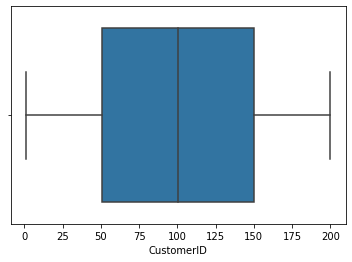

In [24]:
#checking outliers
sns.boxplot(dataset['CustomerID'])

In [25]:
#quantile
qnt=dataset.quantile(q=(0.75,0.25))
qnt

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [26]:
#IQR calculations
iqr=qnt.loc[0.75]-qnt.loc[0.25]
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [27]:
#lower extreme value
lower=qnt.loc[0.25]-1.5*iqr
lower

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [28]:
#upper extreme value
upper=qnt.loc[0.75]+1.5*iqr
upper

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [29]:
#mean value
dataset.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [30]:
#replacing the outliers
dataset['Annual Income (k$)']=np.where(dataset['Annual Income (k$)']>132.750,60.56,dataset['Annual Income (k$)'])

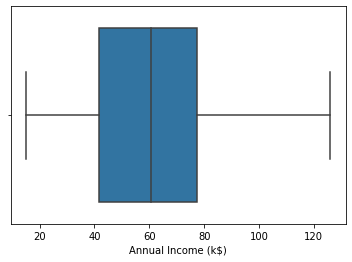

In [31]:
sns.boxplot(dataset["Annual Income (k$)"])

7. Check for Categorical columns and perform encoding

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [33]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [34]:
#encoding
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

In [35]:
dataset['Gender']=en.fit_transform(dataset['Gender'])

In [36]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


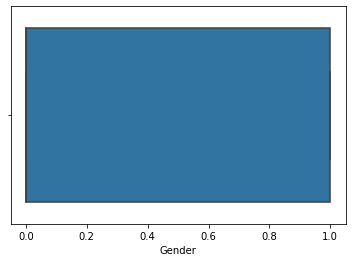

In [37]:
sns.boxplot(dataset['Gender'])

In [38]:
#dropping the unwanted column
df=dataset.drop(['CustomerID'],axis=1)

In [39]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [40]:
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,0,35,120.00,79
196,0,45,126.00,28
197,1,32,126.00,74
198,1,32,60.56,18
199,1,30,60.56,83


In [41]:
df.shape

(200, 4)

In [42]:
df.duplicated().sum()

0

In [43]:
df.iloc[:,:-1]

,Gender,Age,Annual Income (k$)
0,1,19,15.00
1,1,21,15.00
2,0,20,16.00
3,0,23,16.00
4,0,31,17.00
...,...,...,...
195,0,35,120.00
196,0,45,126.00
197,1,32,126.00
198,1,32,60.56


8. Scaling the data

In [44]:
#MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [45]:
data=sc.fit_transform(df.iloc[:,:-1])

9. Perform any of the clustering algorithms

In [46]:
#building the model
from sklearn.cluster import KMeans

In [47]:
TWSS=[]
k=list(range(2,9))
for i in k:
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(data)
  TWSS.append(kmeans.inertia_)

In [48]:
TWSS

[24.485180966263883,
 18.596754361562283,
 13.809959419370049,
 10.065537883369897,
 7.667244355916489,
 6.6254583010105454,
 5.833795603195383]

Text(0, 0.5, 'TWSS')

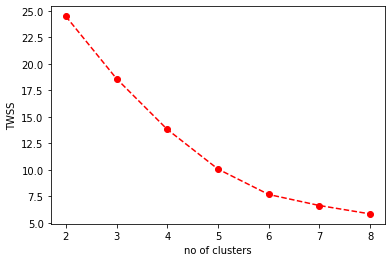

In [49]:
#finding the best k value
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of clusters')
plt.ylabel('TWSS')

In [50]:
model=KMeans(n_clusters=3)
model.fit(data)

KMeans(n_clusters=3)

In [51]:
model.labels_

array([1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int32)

In [52]:
#converting the labels into series
out=pd.Series(model.labels_)

In [53]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


10. Add the cluster data with the primary dataset

In [54]:
#creating a new column in the original dataset
df['clust']=out

In [55]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,19,15.0,39,1
1,1,21,15.0,81,1
2,0,20,16.0,6,0
3,0,23,16.0,77,0
4,0,31,17.0,40,0


11. Split the data into dependent and independent variables

In [56]:
#independent variables
x=df.iloc[:,:-1]

In [57]:
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.00,39
1,1,21,15.00,81
2,0,20,16.00,6
3,0,23,16.00,77
4,0,31,17.00,40
...,...,...,...,...
195,0,35,120.00,79
196,0,45,126.00,28
197,1,32,126.00,74
198,1,32,60.56,18


In [58]:
#dependent variable
y=df.iloc[:,-1]

12. Split the data into training and testing

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,shuffle=True)

In [60]:
x_train.shape

(160, 4)

In [61]:
y_train.shape

(160,)

In [62]:
x_test.shape

(40, 4)

In [63]:
y_test.shape

(40,)

13. Build the model

In [64]:
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix

In [65]:
model=svm.SVC(kernel='linear')

14. Train the model

In [66]:
model.fit(x_train,y_train)

SVC(kernel='linear')

15. Test the model

In [67]:
pred=model.predict(x_test)
pred

array([0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0], dtype=int32)

16. Measure the performance using Evaluation Metrics

In [68]:
#accuracy score
accuracy_score(y_test,pred)

1.0

In [69]:
#confusion matrix
confusion_matrix(y_test,pred)

array([[24,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  5]])